In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

salary_dataset = pd.read_csv('datasets/Salary.csv', sep=',')
years = salary_dataset['YearsExperience'].values.reshape(salary_dataset['YearsExperience'].shape[0], 1)
age = salary_dataset['Age'].values.reshape(salary_dataset['Age'].shape[0], 1)
salary = salary_dataset['Salary'].values.reshape(salary_dataset['Salary'].shape[0], 1)

Text(0.5, 0.92, 'Dependence years and age on salary')

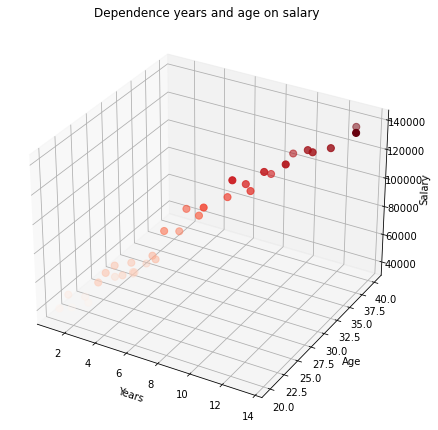

In [2]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(311, projection="3d")

ax.scatter3D(years, age, salary, c=salary, s=50, cmap='Reds')
ax.set_xlabel('Years')
ax.set_ylabel('Age')
ax.set_zlabel('Salary');
ax.set_title('Dependence years and age on salary')

In [3]:
salary_dataset.size

105

Multiple variable regression formula:
\begin{equation}
f(x^{(i)}) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 = \beta_{0} + \beta_{1} YearsExperience + \beta_{2} Age
\end{equation}


Calculation of partial derivative is simlar that is to the param $\beta_{1}$.

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{2}} = \frac{1}{n} \sum^{n}_{i=1} (f(x^{(i)}) - y^{(i)})x_{1}^{(i)}
\end{equation}

Updating the coefficient value is also analogous

\begin{equation}
    \beta_{2} = \beta_{2} - \alpha \frac{\partial SSR}{\partial \beta_{2}} 
\end{equation}

In [4]:
alpha = 0.1
beta0 = np.random.rand()

X = np.array([years, age])

num_elem = np.shape(X)[0]
betas = np.random.rand(num_elem)

In [5]:
print(beta0)
print(betas)

0.5095210994291072
[0.74087054 0.9633579 ]


In [6]:
print(X)

[[[ 1.1]
  [ 1.3]
  [ 1.5]
  [ 2. ]
  [ 2.2]
  [ 2.9]
  [ 3. ]
  [ 3.2]
  [ 3.2]
  [ 3.7]
  [ 3.9]
  [ 4. ]
  [ 4. ]
  [ 4.1]
  [ 4.5]
  [ 4.9]
  [ 5.1]
  [ 5.3]
  [ 5.9]
  [ 6. ]
  [ 6.8]
  [ 7.1]
  [ 7.9]
  [ 8.2]
  [ 8.7]
  [ 9. ]
  [ 9.5]
  [ 9.6]
  [10.3]
  [10.5]
  [11.2]
  [11.5]
  [12.3]
  [12.9]
  [13.5]]

 [[20. ]
  [21. ]
  [21. ]
  [22. ]
  [22. ]
  [22. ]
  [23. ]
  [24. ]
  [24. ]
  [24. ]
  [25. ]
  [25. ]
  [25. ]
  [25. ]
  [26. ]
  [26. ]
  [26. ]
  [27. ]
  [28. ]
  [29. ]
  [29. ]
  [29. ]
  [31. ]
  [31. ]
  [32. ]
  [32. ]
  [33. ]
  [34. ]
  [36. ]
  [34. ]
  [36. ]
  [36. ]
  [37. ]
  [40. ]
  [38. ]]]


In [7]:
import numpy as np

def calc_predictions(beta_0, B, X):
    sum_pred = beta_0
    for bn, xn in zip(B, X):
        sum_pred = sum_pred + bn * xn
    return sum_pred

In [8]:
predictions = calc_predictions(beta0, betas, X)
print(predictions)

[[20.59163667]
 [21.70316867]
 [21.85134278]
 [23.18513595]
 [23.33331006]
 [23.85191943]
 [24.88936438]
 [26.00089639]
 [26.00089639]
 [26.37133166]
 [27.48286367]
 [27.55695072]
 [27.55695072]
 [27.63103777]
 [28.89074389]
 [29.1870921 ]
 [29.33526621]
 [30.44679822]
 [31.85467844]
 [32.89212339]
 [33.48481982]
 [33.70708098]
 [36.22649321]
 [36.44875437]
 [37.78254754]
 [38.0048087 ]
 [39.33860187]
 [40.37604682]
 [42.821372  ]
 [41.04283031]
 [43.48815548]
 [43.71041664]
 [45.26647097]
 [48.60106699]
 [47.11887352]]


In [9]:
print(predictions.size)

35


In [10]:
def calc_ssr(y_pred, y):
    ssr_sum = 0.0
    for yn_pred, yn in zip(y_pred, y):
        ssr_sum += (yn_pred - yn)**2
    ssr = ssr_sum / (2 * y.size)
    return ssr

In [11]:
ssr_error = calc_ssr(predictions, salary)
print(ssr_error)

[4.01927186e+09]


In [12]:
def calc_gradient(X, y, y_pred):
    beta_0_sum = 0.0
    beta_n_sum = 0.0
    num_elem = np.shape(X)[0]
    betas = []
    for _ in range(num_elem):
        #beta_0_sum = 0.0
        for Xn, yn, yn_pred in zip(X[_], y, y_pred):
            beta_0_sum += (yn_pred - yn)
            beta_n_sum += (yn_pred - yn) * Xn
        betas.append(beta_n_sum / y.size)
        beta_n_sum = 0.0
    betas_grad_sum = np.array(betas).flatten()
    return beta_0_sum / y.size, betas_grad_sum

In [13]:
beta0_gradient, betas_gradient = calc_gradient(X, salary, predictions)

In [14]:
print(betas_gradient)

[ -640232.71898161 -2549701.58331696]


In [15]:
def update_weights(alpha, beta, beta_gradient):
    return beta - alpha * beta_gradient

In [16]:
beta0 = update_weights(alpha, beta0, beta0_gradient)

In [17]:
print(betas_gradient)
betas = update_weights(alpha, betas, betas_gradient)

print(betas)

[ -640232.71898161 -2549701.58331696]
[ 64024.0127687  254971.12168959]


In [18]:
def learn_and_fit(X, y):
    # YOUR CODE HERE
    b0 = []
    betas = []
    error = []
    epochs = 20
    
    alpha = 0.002
    beta_0 = 0.85
    beta_1 = 0.6
    beta_2 = 0.7
    current_betas = np.array([beta_1, beta_2], dtype=np.float64)
    
    b0.append(beta_0)
    betas.append([beta_1, beta_2])
    
    
    for _ in range (epochs):
        pred = calc_predictions(beta_0, current_betas, X)
        ssr_error = calc_ssr(pred, y)
        print(ssr_error)
        beta0_gradient, betas_gradient = calc_gradient(X, y, pred)
        beta_0 = update_weights(alpha, beta_0, beta0_gradient)
        current_betas = update_weights(alpha, current_betas, betas_gradient)
        b0.append(beta_0)
        betas.append(current_betas)
        error.append(ssr_error)
    betas = np.array(betas)
    return b0, betas, error


In [19]:
b0, betas, error = learn_and_fit(X, salary)

[4.02000502e+09]
[2.41726885e+09]
[1.4691916e+09]
[9.08096961e+08]
[5.75761434e+08]
[3.78658996e+08]
[2.61506228e+08]
[1.91624881e+08]
[1.49698605e+08]
[1.24309258e+08]
[1.08707328e+08]
[98902930.89360619]
[92537397.97883728]
[88216278.60777378]
[85115073.92991316]
[82746188.21096556]
[80821173.62480047]
[79169303.19583154]
[77689439.25385673]
[76321582.8332514]


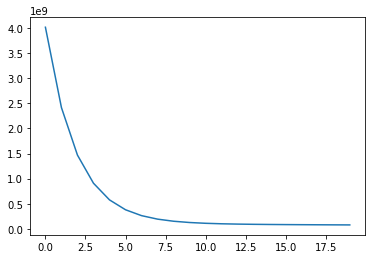

In [20]:
plt.plot(error)

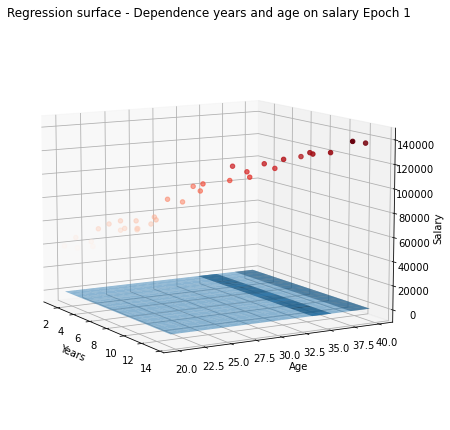

In [21]:
from mpl_toolkits import mplot3d

fig1 = plt.figure(figsize=(25,25))

ax1 = fig1.add_subplot(311, projection="3d")

ax1.set_xlabel('Years')
ax1.set_ylabel('Age')
ax1.set_zlabel('Salary');
ax1.set_title('Regression surface - Dependence years and age on salary Epoch 1')

ax1.scatter3D(years, age, salary, c=salary, cmap='Reds')

xx1, xx2 = np.meshgrid(years, age)
z = b0[0] + (betas[0][0] * xx1) + (betas[0][1] * xx2)
ax1.plot_surface(xx1, xx2, z, alpha=0.5)
ax1.view_init(elev=10, azim=-30)
plt.show()

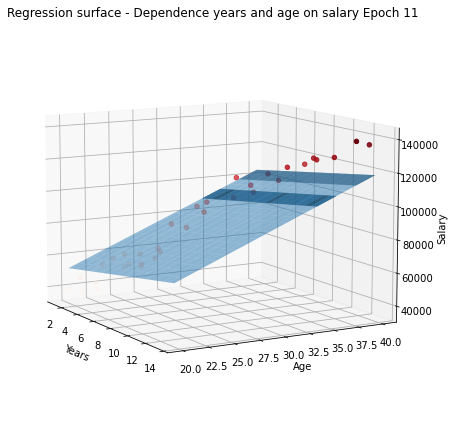

In [22]:
fig1 = plt.figure(figsize=(25,25))

ax1 = fig1.add_subplot(311, projection="3d")

ax1.set_xlabel('Years')
ax1.set_ylabel('Age')
ax1.set_zlabel('Salary');
ax1.set_title('Regression surface - Dependence years and age on salary Epoch 11')

ax1.scatter3D(years, age, salary, c=salary, cmap='Reds')

xx1, xx2 = np.meshgrid(years, age)
z = b0[10] + (betas[10][0] * xx1) + (betas[10][1] * xx2)
ax1.plot_surface(xx1, xx2, z, alpha=0.5)
ax1.view_init(elev=10, azim=-30)
plt.show()

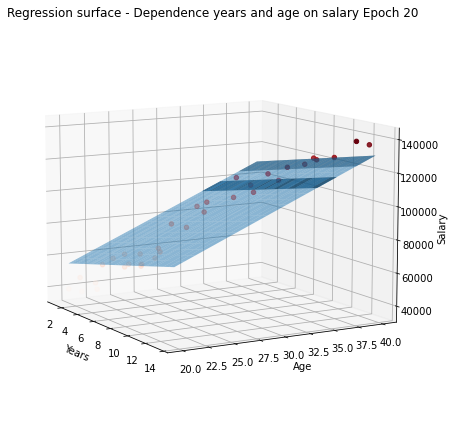

In [23]:
fig1 = plt.figure(figsize=(25,25))

ax1 = fig1.add_subplot(311, projection="3d")

ax1.set_xlabel('Years')
ax1.set_ylabel('Age')
ax1.set_zlabel('Salary');
ax1.set_title('Regression surface - Dependence years and age on salary Epoch 20')

ax1.scatter3D(years, age, salary, c=salary, cmap='Reds')

xx1, xx2 = np.meshgrid(years, age)
z = b0[19] + (betas[19][0] * xx1) + (betas[19][1] * xx2)
ax1.plot_surface(xx1, xx2, z, alpha=0.5)
ax1.view_init(elev=10, azim=-30)
plt.show()

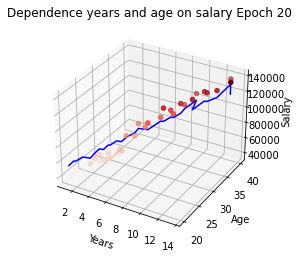

In [24]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
x, y, z = years.flatten(), age.flatten(), np.array([b0[19] + (betas[19][0] * years) + (betas[19][1] * age)]).flatten()
ax.plot3D(x, y, z, 'blue')
ax.scatter3D(years, age, salary, c=salary, cmap='Reds')
ax.set_xlabel('Years')
ax.set_ylabel('Age')
ax.set_zlabel('Salary');
ax.set_title('Dependence years and age on salary Epoch 20')

plt.show()

In [25]:
multi_dataset = pd.read_csv('datasets/multi_variable_regression.csv', sep=',')
x1 = multi_dataset['x1'].values.reshape(multi_dataset['x1'].shape[0], 1)
x2 = multi_dataset['x2'].values.reshape(multi_dataset['x2'].shape[0], 1)
x3 = multi_dataset['x3'].values.reshape(multi_dataset['x3'].shape[0], 1)
x4 = multi_dataset['x4'].values.reshape(multi_dataset['x4'].shape[0], 1)
x5 = multi_dataset['x5'].values.reshape(multi_dataset['x5'].shape[0], 1)
x6 = multi_dataset['x6'].values.reshape(multi_dataset['x6'].shape[0], 1)
y = multi_dataset['y'].values.reshape(multi_dataset['y'].shape[0], 1)

In [26]:
X_vars = np.array([x1, x2, x3, x4, x5, x6])

num_elem = np.shape(X_vars)[0]
betas = np.random.rand(num_elem)
print(betas)

[0.66016032 0.74291156 0.70456277 0.56315114 0.49263919 0.0431121 ]


In [27]:
def learn_and_fit(X, y):
    # YOUR CODE HERE
    b0 = []
    betas = []
    error = []
    epochs = 30
    
    alpha = 0.2
    beta_0 = np.array([0.85])
    num_elem = np.shape(X)[0]
    current_betas = np.random.rand(num_elem)
    
    b0.append(beta_0)
    betas.append(current_betas)
    
    
    for _ in range (epochs):
        pred = calc_predictions(beta_0, current_betas, X)
        ssr_error = calc_ssr(pred, y)
        print(ssr_error)
        beta0_gradient, betas_gradient = calc_gradient(X, y, pred)
        beta_0 = update_weights(alpha, beta_0, beta0_gradient)
        current_betas = update_weights(alpha, current_betas, betas_gradient)
        b0.append(beta_0)
        betas.append(current_betas)
        error.append(ssr_error)
    betas = np.array(betas)
    return b0, betas, error

In [28]:
b0, betas, error = learn_and_fit(X_vars, y)

[14289.51235386]
[8223.43549403]
[4936.92364424]
[3016.92822754]
[1873.42239218]
[1182.0845868]
[757.66732755]
[492.99004575]
[325.31295431]
[217.44229942]
[147.02370772]
[100.424054]
[69.20199077]
[48.04991606]
[33.57956601]
[23.59604209]
[16.65774773]
[11.80572272]
[8.39466912]
[5.98588045]
[4.27840308]
[3.06416047]
[2.1983174]
[1.57947521]
[1.13629443]
[0.81837288]
[0.58997335]
[0.42567942]
[0.30736775]
[0.22208653]


In [29]:
print(betas)

[[ 7.64175342e-01  8.92026531e-01  5.03649903e-03  4.16132822e-01
   1.98105925e-01  7.35491829e-01]
 [ 1.47198745e+01  2.10078303e+01 -5.96591675e+00  1.97195960e+01
   3.05555893e-01  1.99574871e+01]
 [ 2.46923141e+01  3.41372197e+01 -8.05758436e+00  3.43806132e+01
   4.72092186e-01  3.49383032e+01]
 [ 3.18159129e+01  4.42996109e+01 -9.24038335e+00  4.59248255e+01
   1.02143799e+00  4.69439064e+01]
 [ 3.68952087e+01  5.17603858e+01 -9.42792298e+00  5.49438881e+01
   1.69672455e+00  5.65368634e+01]
 [ 4.05121350e+01  5.73318404e+01 -9.05866766e+00  6.20250975e+01
   2.43560157e+00  6.42465693e+01]
 [ 4.30842089e+01  6.14758070e+01 -8.32865232e+00  6.75914084e+01
   3.17500817e+00  7.04625877e+01]
 [ 4.49111503e+01  6.45662354e+01 -7.39965226e+00  7.19765777e+01
   3.88189511e+00  7.54933508e+01]
 [ 4.62076199e+01  6.68730362e+01 -6.37675861e+00  7.54375956e+01
   4.53662946e+00  7.95789736e+01]
 [ 4.71271219e+01  6.85979256e+01 -5.33165863e+00  7.81743259e+01
   5.13001185e+00  8.2908

In [30]:
print(np.array(b0).flatten())

[ 0.85       28.92839697 14.20411916 11.46073807  7.66037183  5.32368869
  3.55255989  2.31042501  1.42807904  0.81312193  0.39026174  0.1058818
 -0.07966243 -0.19523465 -0.26185424 -0.29474129 -0.30485979 -0.30005239
 -0.28588036 -0.26624321 -0.24383529 -0.22048169 -0.19738465 -0.17530394
 -0.15468836 -0.13577128 -0.11863959 -0.10328321 -0.08963038 -0.07757242
 -0.06698102]


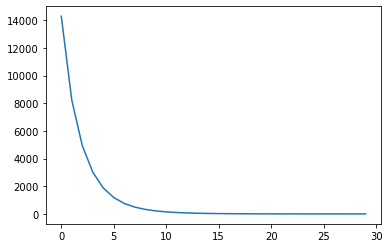

In [31]:
plt.plot(error)